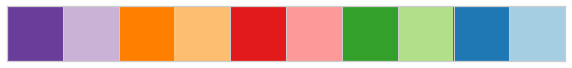

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import glob

sns.set(style="whitegrid", font_scale = 2.5)
palette = sns.color_palette("Paired", 10)
palette.reverse()
sns.palplot(palette)
sns.set_palette(palette)

pinned to dirs in /home/wesley_m/conformal-bayesopt/results/

In [11]:
keys = ["rnd", "ehvi", "nehvi", "cehvi", "cnehvi"]#, "nparego", "cnparego"]
labels = {k: kk for k, kk in zip(keys,
                                 ["Random", "EHVI", "NEHVI", "Conformal EHVI", "Conformal NEHVI"],
                                # "NParEGO", "Conformal NParEGO"]
                                )}

keys = [keys[3], keys[1], keys[4], keys[2], keys[0]]

In [12]:
# b5fd961c

In [13]:
labels

{'rnd': 'Random',
 'ehvi': 'EHVI',
 'nehvi': 'NEHVI',
 'cehvi': 'Conformal EHVI',
 'cnehvi': 'Conformal NEHVI'}

In [14]:
%pdb

Automatic pdb calling has been turned OFF


In [15]:
def get_results(prefix):
    results_dict = {k: [] for k in keys}
    for f in glob.glob("../results/"+prefix+"*.pt"):
        res = torch.load(f, map_location = "cpu")
        res2 = res["results"]["best_achieved"]
        for key in keys:
            try:
                results_dict[key].append(res2[key])
            except:
                print(key, "missing from ", f)
    return results_dict
        

In [16]:
def prep_mean_and_bands(lst, slice_ind=0):
    try:
        tsr = torch.tensor(lst)
    except:
        tsr = torch.stack(lst)#.t()
    if tsr.ndim > 2:
        tsr = tsr[...,slice_ind]
    cummaxes = tsr.cummax(0)[0]
    means = cummaxes.mean(0)
    stds = cummaxes.std(0)
    band = 2. * stds / cummaxes.shape[0]**0.5
    return means, means - band, means + band 

/tmp/ipykernel_2830/2801252224.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tsr = torch.tensor(lst)
/tmp/ipykernel_2830/2801252224.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tsr = torch.tensor(lst)
/tmp/ipykernel_2830/2801252224.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tsr = torch.tensor(lst)
/tmp/ipykernel_2830/2801252224.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourc

Text(0.5, 1.0, 'CarSide')

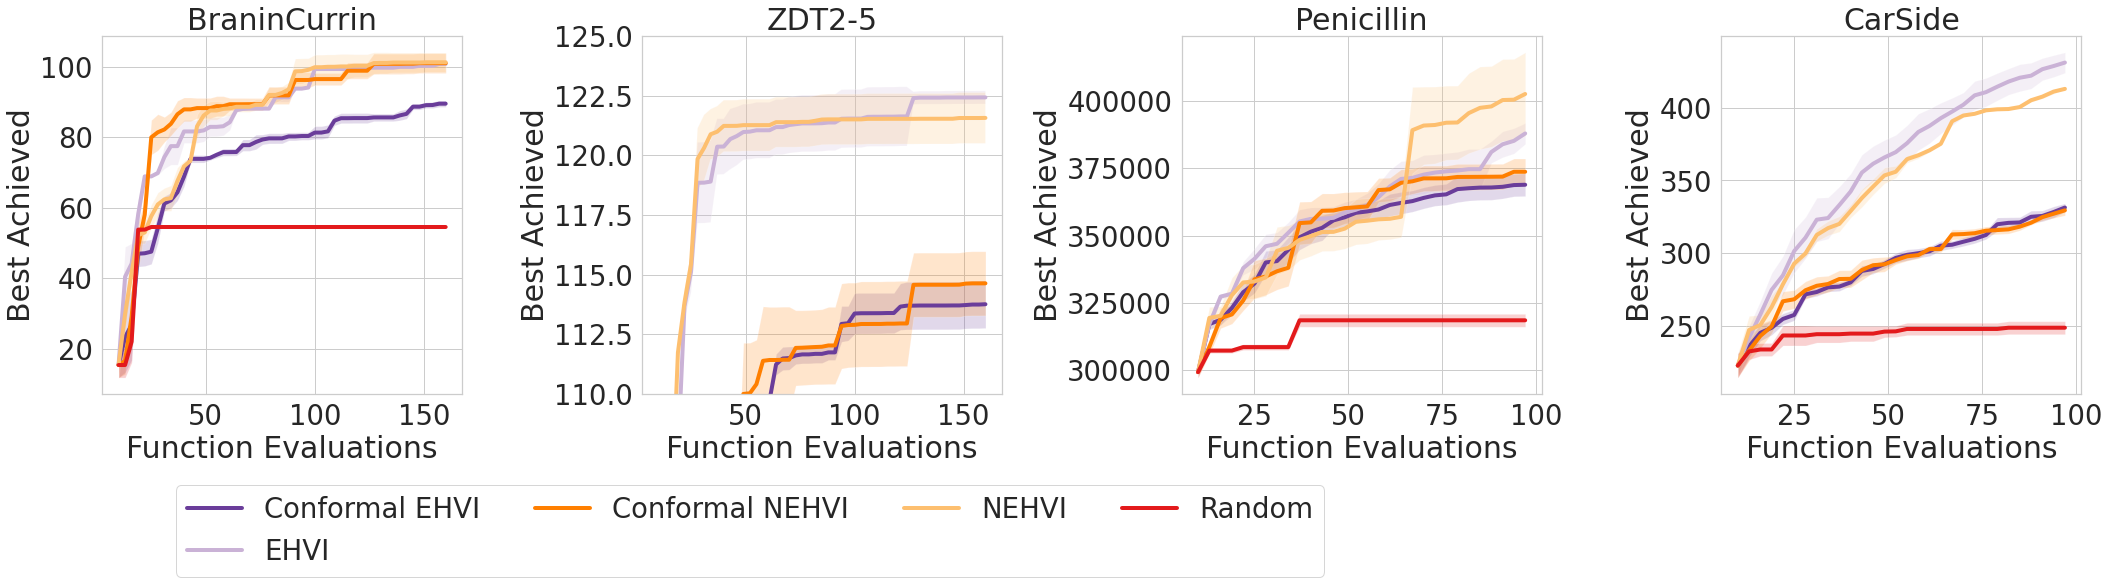

In [17]:
fig, ax = plt.subplots(1, 4, figsize = (30, 7))
# ax = [ax]
prefix_lens = [51, 51, 30, 30]

for i, prefix in enumerate(["branincurrin", "zdt", "penicillin", "carside"]):
    results_dict = get_results(prefix)
    for key in keys:
        if key == "rnd":
            results_dict["rnd"] = torch.tensor(results_dict["rnd"]).cummax(1)[0]
        x = torch.arange(10, prefix_lens[i]*3 + 10, 3)
        ax[i].plot(x, prep_mean_and_bands(results_dict[key])[0], label = labels[key], linewidth=4)
        ax[i].fill_between(x, *prep_mean_and_bands(results_dict[key])[1:], alpha = 0.2)

    # ax[i].set_ylim((-4., 0.2))
    ax[i].set_xlabel("Function Evaluations")
    ax[i].set_ylabel("Best Achieved")
# ax[0].set_ylim((40, 60))
ax[1].set_ylim((110, 125))
# ax[2].set_ylim((310000, 390000))
plt.tight_layout()
ax[2].legend(ncol = 4, loc = "lower center", bbox_to_anchor = (-1.2, -0.55))
# ax[0].legend(ncol = 3, loc = "lower center", bbox_to_anchor = (0.5, -0.5))

ax[0].set_title("BraninCurrin")
ax[1].set_title("ZDT2-5")
ax[2].set_title("Penicillin")
ax[3].set_title("CarSide")

# plt.savefig("mobo_lownoise_q3.pdf", bbox_inches = "tight")

In [18]:
%pdb

Automatic pdb calling has been turned ON


In [19]:
# keys = ["ei", "nei", "ucb", "cei", "cnei", "cucb"]
keys = keys[:-1]

def get_results(prefix):
    results_dict = {k: [] for k in keys}
    for f in glob.glob("../results/"+prefix+"*.pt"):
        res = torch.load(f, map_location = "cpu")
        res2 = res["results"]["coverage"]
        for key in keys:
            try:
                results_dict[key].append(res2[key])
            except:
                print(key, "missing from ", f)
    return results_dict

Text(0.5, 1.0, 'Penicillin')

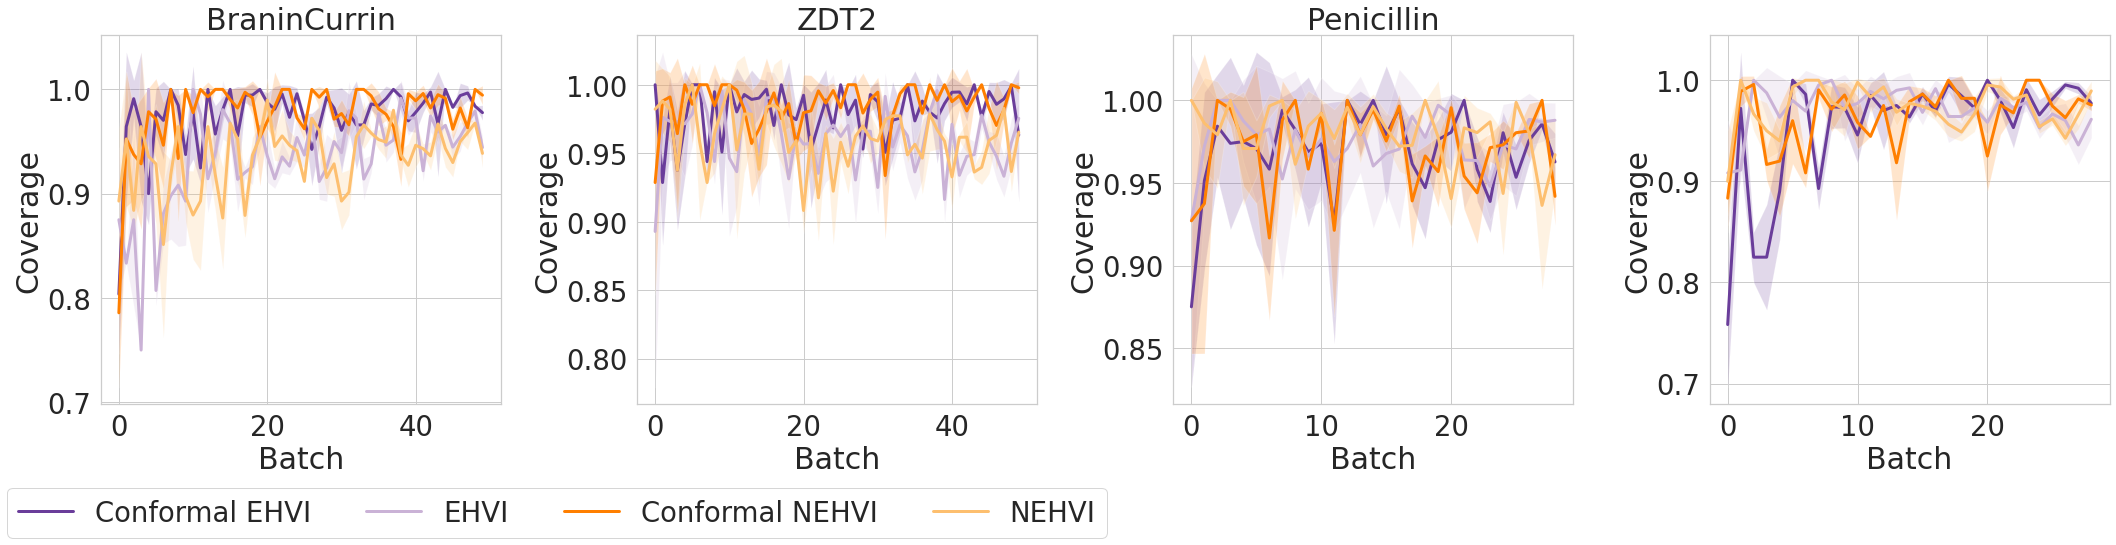

In [20]:
fig, ax = plt.subplots(1, 4, figsize = (30, 7))

for i, prefix in enumerate(["branincurrin", "zdt", "penicillin", "carside"]):
    results_dict = get_results(prefix)
    for key in keys:
        slice_ind = 1 if key[0] == "c" else 0
        # slice_ind = 0
        mean, lower, upper = prep_mean_and_bands(results_dict[key], slice_ind)
        x = torch.arange(mean.shape[0])
        ax[i].plot(x, mean, label = labels[key], linewidth=3)
        ax[i].fill_between(x, lower, upper, alpha = 0.2)

    # ax[i].set_ylim((-4., 0.2))
    ax[i].set_xlabel("Batch")
    ax[i].set_ylabel("Coverage")
# ax[2].set_ylim((-15, -1.))
plt.tight_layout()
ax[1].legend(ncol = 6, loc = "lower center", bbox_to_anchor = (-0.2, -0.4))

ax[0].set_title("BraninCurrin")
ax[1].set_title("ZDT2")
ax[2].set_title("Penicillin")

In [21]:
alpha = 1.0 / (0.8 * torch.arange(10, 50 * 3 + 10, 3))**0.5

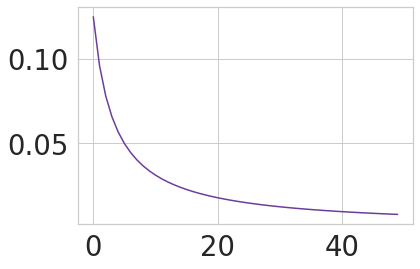

In [22]:
plt.plot(alpha**2)

In [23]:
from scipy.stats import binom

In [24]:
torch.arange(12)[binom.cdf(torch.arange(12), 12, 0.5) < 0.025][-1]

tensor(2)

In [25]:
torch.arange(12)[binom.cdf(torch.arange(12), 12, 0.5) > 0.975][0]

tensor(9)

In [26]:
%pdb

Automatic pdb calling has been turned OFF


Text(0.5, 1.0, 'CarSide')

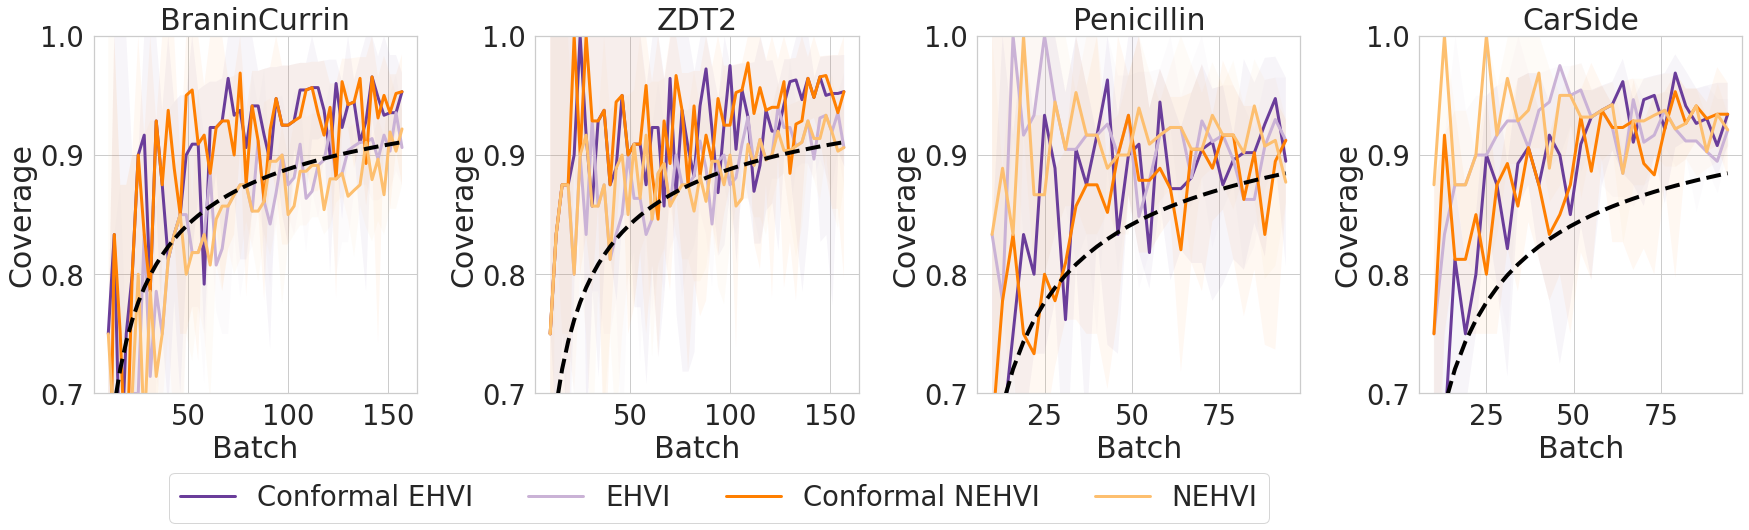

In [27]:
fig, ax = plt.subplots(1, 4, figsize = (25, 7))



for i, prefix in enumerate(["branincurrin", "zdt", "penicillin", "carside"]):
    results_dict = get_results(prefix)
    
    for key in keys:
        tsr = torch.tensor(results_dict[key])
        medians = tsr.nanmedian(0)[0]
        # sorted_cvals = tsr.sort(0)[0][[3, 10]]
        x = torch.arange(10, medians.shape[0] * 3 + 10, 3)
        slice_ind = 1 if key[0] == "c" else 0
        ax[i].plot(x, medians[...,slice_ind], label = labels[key], linewidth=3)
        
        ntrials = tsr.shape[0]
        try:
            l = torch.arange(ntrials)[binom.cdf(torch.arange(ntrials), ntrials, 0.5) < 0.025][-1].item()
            u = torch.arange(ntrials)[binom.cdf(torch.arange(ntrials), ntrials, 0.5) > 0.975][0].item()
        except IndexError:
            l = 0
            u = -1
        sorted_cvals = tsr.sort(0)[0][[l, u]]
        
        # ax[i].plot(prep_mean_and_bands(results_dict[key],1)[0], label = labels[key], linewidth=3)
        ax[i].fill_between(x, sorted_cvals[0, ..., slice_ind], sorted_cvals[1, ..., slice_ind], alpha = 0.05)
    ax[i].plot(x, 1 - alpha[:x.shape[0]], color = "black", linestyle="--", zorder=10, linewidth = 4)
    # ax[i].set_ylim((-4., 0.2))
    ax[i].set_xlabel("Batch")
    ax[i].set_ylabel("Coverage")
    ax[i].set_ylim((0.7, 1.0))
# ax[2].set_ylim((-15, -1.))
plt.tight_layout()
ax[2].legend(ncol = 6, loc = "lower center", bbox_to_anchor = (-0.8, -0.4))

ax[0].set_title("BraninCurrin")
ax[1].set_title("ZDT2")
ax[2].set_title("Penicillin")
ax[3].set_title("CarSide")
# plt.savefig("mobo_coverage.pdf", bbox_inches = "tight")

In [28]:
def get_results(prefix):
    results_dict = {k: [] for k in keys}
    for f in glob.glob("../results/"+prefix+"*.pt"):
        res = torch.load(f)
        res2 = res["results"]["inputs"]
        for key in keys:
            try:
                results_dict[key].append(res2[key])
            except: 
                print("unable to load", key, "from", f)
    return results_dict

In [29]:
!nvidia-smi

Sun May 15 09:25:44 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 465.19.01    CUDA Version: 11.3     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA TITAN RTX    On   | 00000000:1A:00.0 Off |                  N/A |
| 57%   76C    P2   272W / 280W |  11568MiB / 24220MiB |     97%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA TITAN RTX    On   | 00000000:1B:00.0 Off |                  N/A |
| 57%   

In [30]:
from botorch.test_functions import BraninCurrin, ZDT2, CarSideImpact, Penicillin
from botorch.utils.multi_objective.box_decompositions.dominated import DominatedPartitioning

In [31]:
def get_hvols(inp, problem):
    bounded_inputs = torch.stack(inp)
    
    inputs = bounded_inputs.cpu() * (problem.bounds[1] - problem.bounds[0]) + problem.bounds[0]
    noiseless = problem(inputs)
    hvol_list = []
    for i in range(10, noiseless.shape[1], 3):
        if problem.num_objectives == 2:
            bd = DominatedPartitioning(ref_point=problem.ref_point, Y=noiseless[:,:i].cpu())
            volume = bd.compute_hypervolume()
        else:
            vol_list = []
            for batch in noiseless.cpu():
                bd = DominatedPartitioning(ref_point=problem.ref_point, Y=batch[:i].cpu().float())
                vol_list.append(bd.compute_hypervolume().item())
            volume = torch.tensor(vol_list)    
        hvol_list.append(volume)
    return torch.stack(hvol_list)

In [32]:
%pdb

Automatic pdb calling has been turned ON


In [34]:
keys = ["rnd", "ehvi", "nehvi", "cehvi", "cnehvi"]#, "nparego", "cnparego"]
labels = {k: kk for k, kk in zip(keys, 
                                 ["Random", "EHVI", "NEHVI", "Conformal EHVI", "Conformal NEHVI"],
                                 #"NParEGO", "Conformal NParEGO"]
                                )}

keys = [keys[3], keys[1], keys[4], keys[2], keys[0]]
keys = keys[:-1]

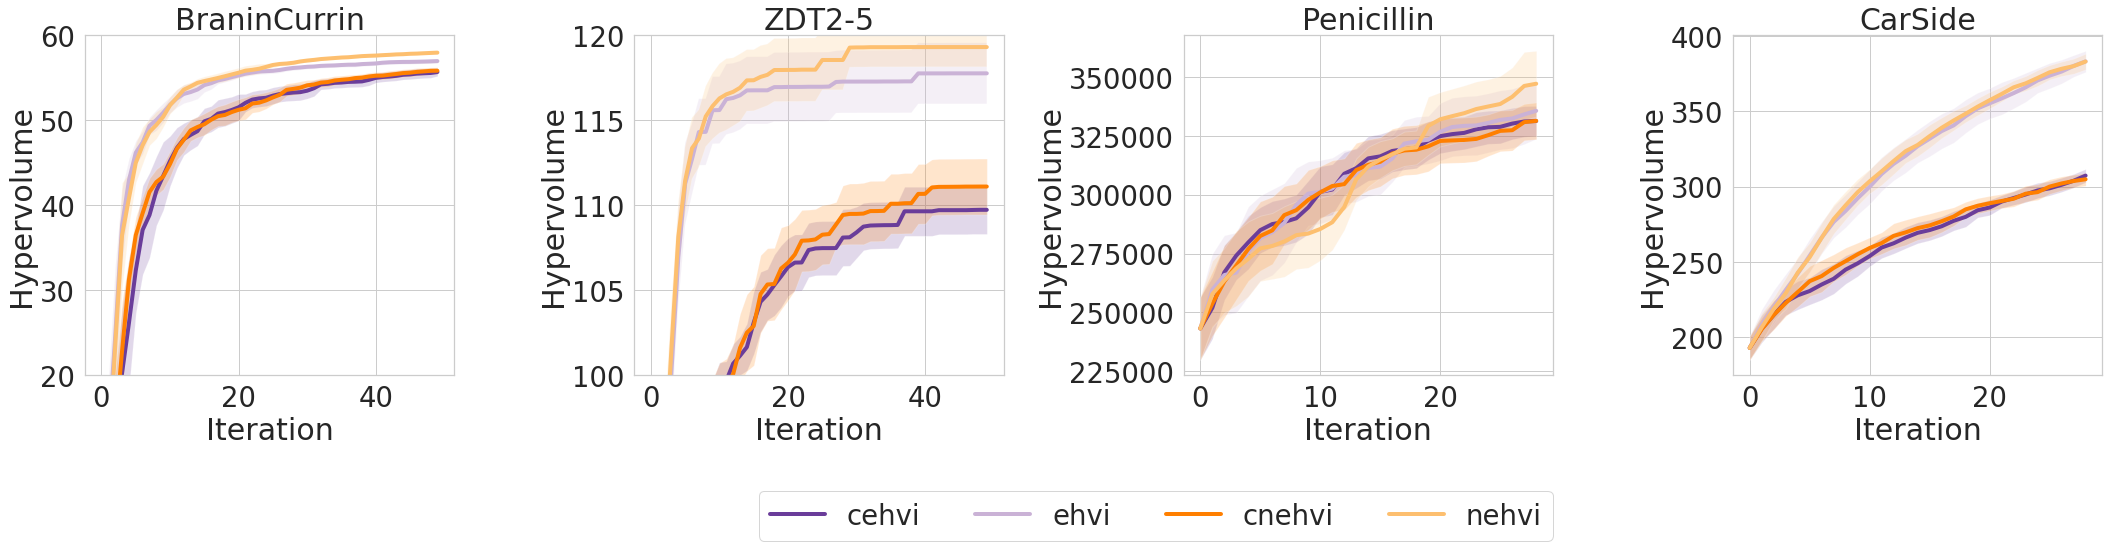

In [35]:
fig, ax = plt.subplots(1, 4, figsize = (30, 7))


branin_inputs = get_results("branincurrin")
problem = BraninCurrin(negate=True)

for key in keys:
    hvols = get_hvols(branin_inputs[key], problem)
    mean = hvols.mean(1)
    std = hvols.std(1)
    lower = mean - 2 * std / hvols.shape[1]**0.5
    upper = mean + 2 * std / hvols.shape[1]**0.5
    x = torch.arange(mean.shape[0])
    
    ax[0].plot(x, mean, linewidth=4, label = key)
    ax[0].fill_between(x, lower, upper, alpha = 0.2)
    
zdt_inputs = get_results("zdt2")
problem = ZDT2(dim=5, negate=True)

for key in keys:
    hvols = get_hvols(zdt_inputs[key], problem)
    mean = hvols.mean(1)
    std = hvols.std(1)
    lower = mean - 2 * std / hvols.shape[1]**0.5
    upper = mean + 2 * std / hvols.shape[1]**0.5
    x = torch.arange(mean.shape[0])
    
    ax[1].plot(x, mean, linewidth=4, label = key)
    ax[1].fill_between(x, lower, upper, alpha = 0.2)

branin_inputs = get_results("penicillin")
problem = Penicillin(negate=True)

for key in keys:
    hvols = get_hvols(branin_inputs[key], problem)
    mean = hvols.mean(1)
    std = hvols.std(1)
    lower = mean - 2 * std / hvols.shape[1]**0.5
    upper = mean + 2 * std / hvols.shape[1]**0.5
    x = torch.arange(mean.shape[0])
    
    ax[2].plot(x, mean, linewidth=4, label = key)
    ax[2].fill_between(x, lower, upper, alpha = 0.2)

branin_inputs = get_results("carside")
problem = CarSideImpact(negate=True)

for key in keys:
    hvols = get_hvols(branin_inputs[key], problem)
    mean = hvols.mean(1)
    std = hvols.std(1)
    lower = mean - 2 * std / hvols.shape[1]**0.5
    upper = mean + 2 * std / hvols.shape[1]**0.5
    x = torch.arange(mean.shape[0])
    
    ax[3].plot(x, mean, linewidth=4, label = key)
    ax[3].fill_between(x, lower, upper, alpha = 0.2)
    
ax[0].set_xlabel("Iteration")
ax[1].set_xlabel("Iteration")
ax[2].set_xlabel("Iteration")
ax[3].set_xlabel("Iteration")

ax[0].set_ylabel("Hypervolume")
ax[1].set_ylabel("Hypervolume")
ax[2].set_ylabel("Hypervolume")
ax[3].set_ylabel("Hypervolume")

ax[0].set_title("BraninCurrin")
ax[1].set_title("ZDT2-5")
ax[2].set_title("Penicillin")
ax[3].set_title("CarSide")

ax[0].set_ylim((20, 60))
ax[1].set_ylim((100, 120))
plt.tight_layout()
ax[1].legend(ncol = 6, bbox_to_anchor = (0.3, -0.3))